# **EVALUACION 2 MINERIA DE DATOS 2024 (BIY7121_004V) - TEMPERATURA**

Alumno: **Cristóbal Cabezas Espinoza**

In [260]:
# Importamos librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

## **1. BUSSINESS UNDERSTANDING**

### 1.1. **Contexto** 


Se nos ha entregado un dataset correspondiente a...

### 1.2. **Definición de columnas**

In [159]:
# Cargamos el dataset
temperature_df = pd.read_csv("temperatura.csv", delimiter=',')

## **2. DATA UNDERSTANDING**

### **2.1. EDA**

In [160]:
# Numero total de filas y columnas, respectivamente
print('N° filas: ', temperature_df.shape[0])
print('N° columnas: ', temperature_df.shape[1])

N° filas:  142193
N° columnas:  24


In [161]:
temperature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [162]:
# Mostramos los primeros 5 registros
temperature_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [163]:
# Los ultimos 5 registros
temperature_df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No
142192,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,0.0,No


In [164]:
# Resumen estadístico de nuestras columnas
temperature_df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


### 2.2. **Algunos gráficos**

#### 2.2.1. Análisis de distribución

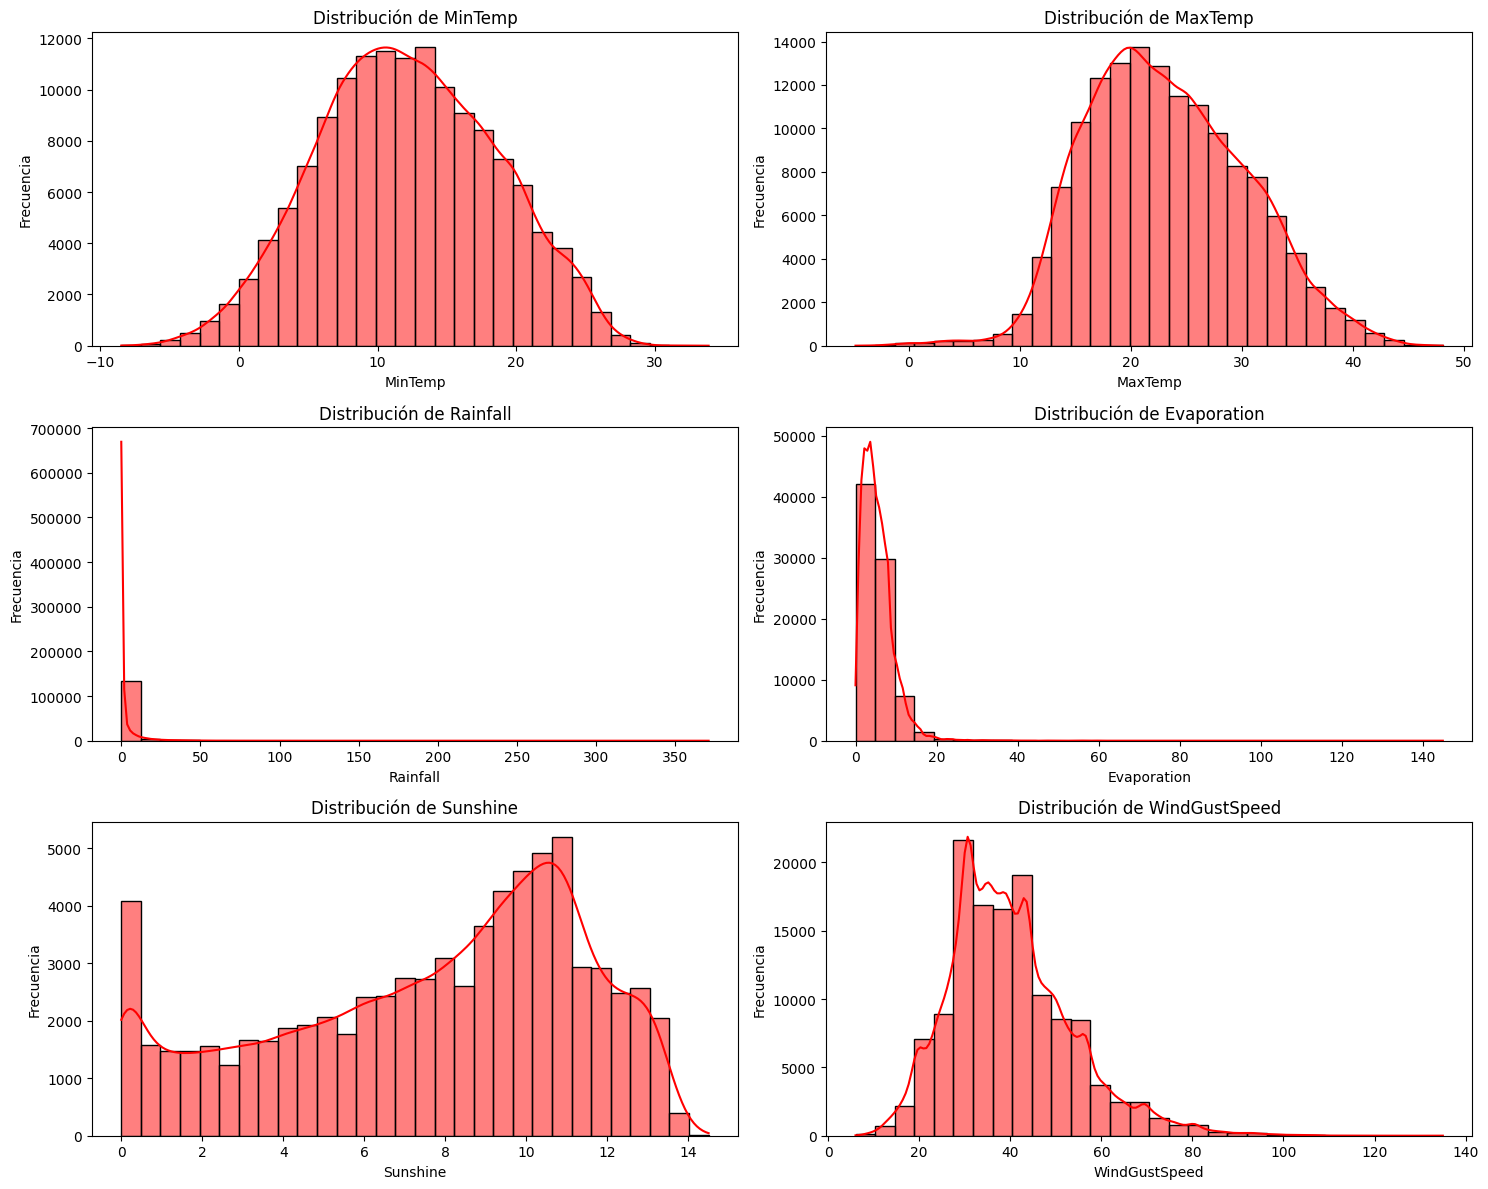

In [165]:
# Seleccionando solo columnas numéricas para los gráficos de distribución
num_cols = temperature_df.select_dtypes(include=['float64']).columns

# Configurando el tamaño de la figura para los gráficos
plt.figure(figsize=(15, 12))

# Generando gráficos de distribución (histogramas) para las primeras 6 características numéricas
for i, col in enumerate(num_cols[:6]):
    plt.subplot(3, 2, i+1)
    sns.histplot(temperature_df[col], kde=True, bins=30, color='red')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

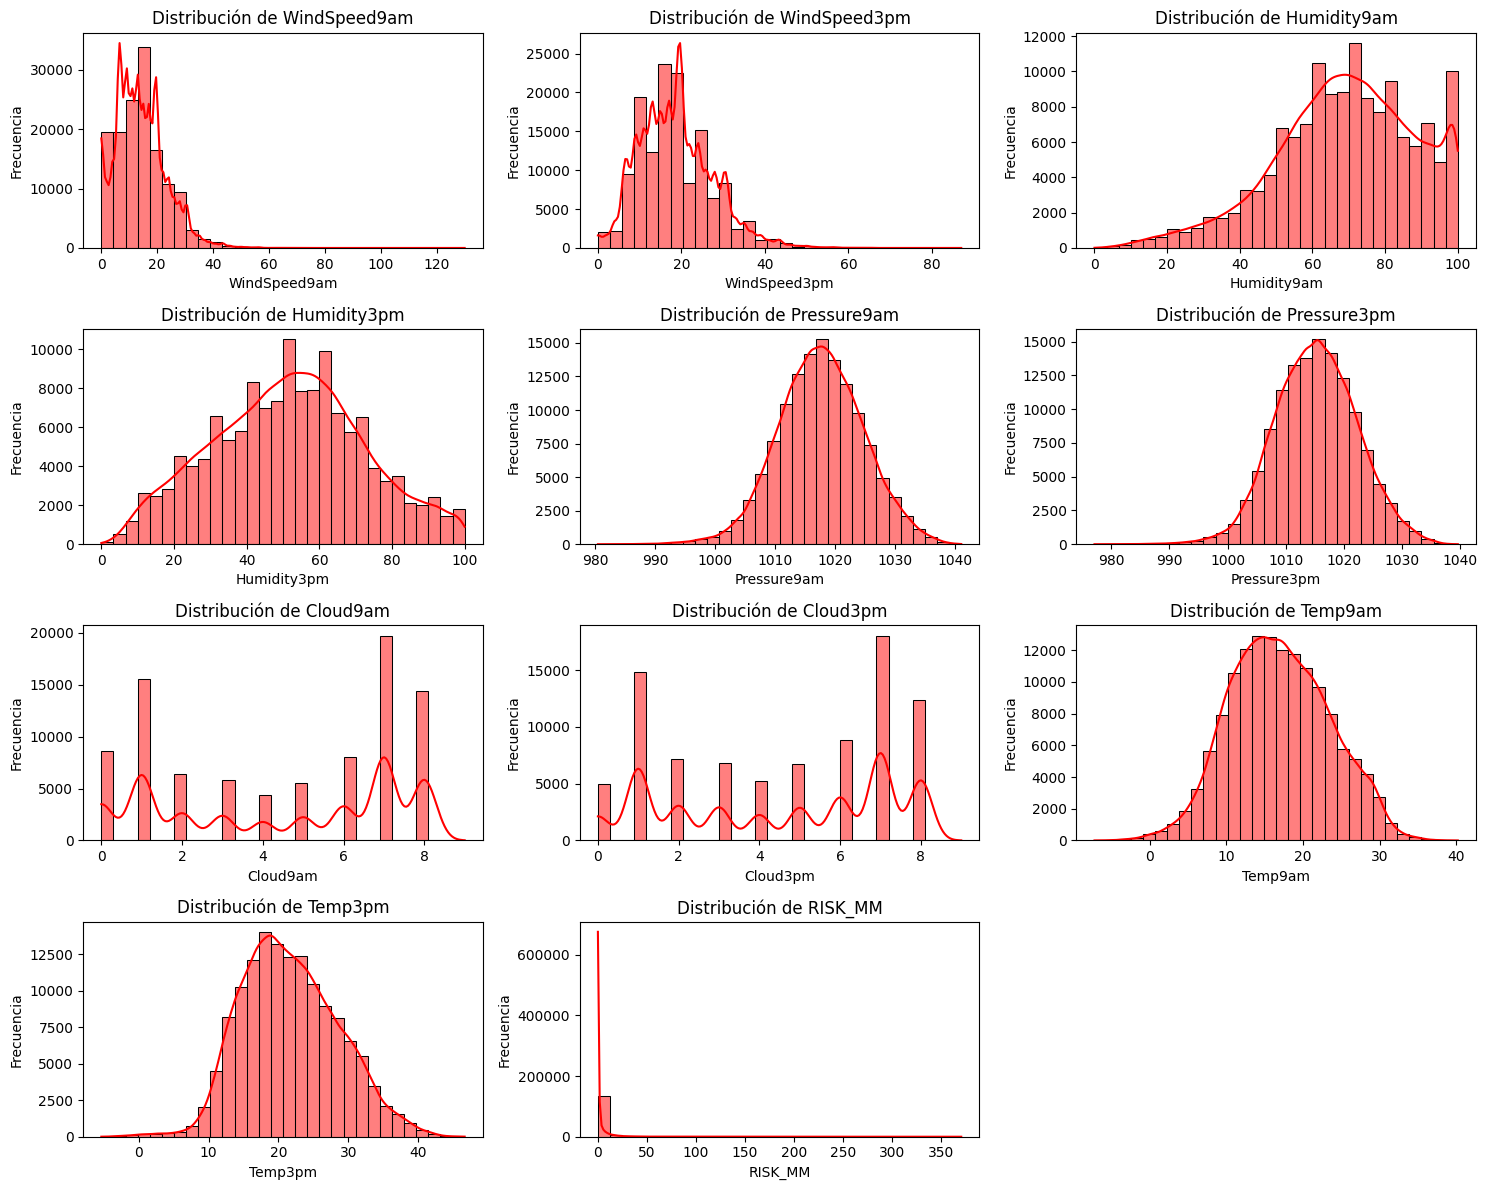

In [166]:
# Configurando el tamaño de la figura para los gráficos
plt.figure(figsize=(15, 12))

# Número de columnas a graficar
num_columns = len(num_cols[6:])

# Calculando el número de filas necesarias para el layout (ajustar según sea necesario)
n_rows = (num_columns + 2) // 3

# Generando gráficos para las características numéricas restantes
for i, col in enumerate(num_cols[6:]):
    if col in ['Year', 'Month', 'Day', 'Hour']:
        continue
    plt.subplot(n_rows, 3, i+1)  # Ajustando el layout para acomodar las gráficas
    sns.histplot(temperature_df[col], kde=True, bins=30, color='red')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

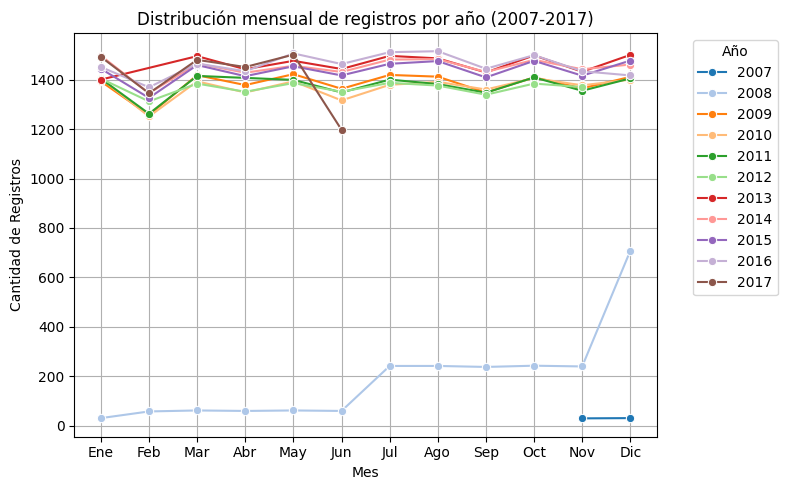

In [167]:
temp_for_date = temperature_df.copy()

# Convirtiendo la columna 'Date' a un tipo de datos de fecha
temp_for_date['Date'] = pd.to_datetime(temp_for_date['Date'])
# Creando nuevas columnas 'DateYear' y 'DateMonth'
temp_for_date['DateYear'] = temp_for_date['Date'].dt.year
temp_for_date['DateMonth'] = temp_for_date['Date'].dt.month
# Agrupando los datos por 'DateYear' y 'DateMonth'
grouped_df = temp_for_date.groupby(['DateYear', 'DateMonth']).size().reset_index(name='Counts')
# Nombres de los meses para las etiquetas del eje X
month_names = ["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"]
# Creando el gráfico
plt.figure(figsize=(8, 5))
lineplot = sns.lineplot(data=grouped_df, x='DateMonth', y='Counts', hue='DateYear', palette='tab20', marker='o')
# Configurando el gráfico
plt.title('Distribución mensual de registros por año (2007-2017)')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Registros')
plt.xticks(ticks=range(1, 13), labels=month_names)  # Etiquetas de meses
# Ajustando la leyenda para incluir todos los años
plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipykernel_5770/600513922.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs.set_xticklabels(column_counts.index, rotation=90)


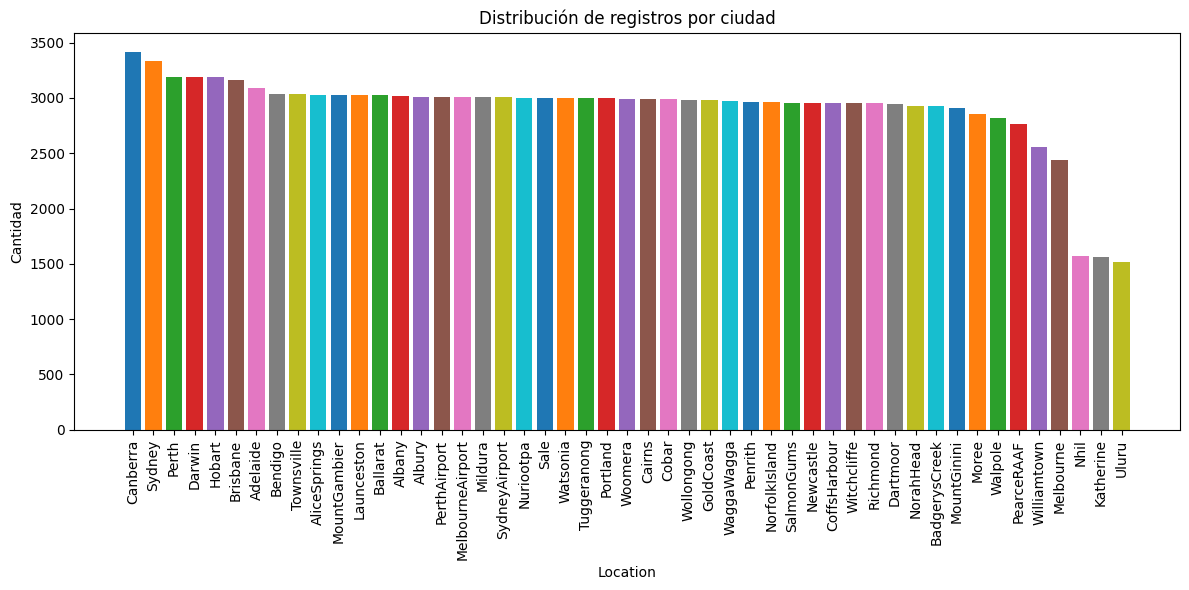

In [168]:
# Contar los valores de la columna
column_counts = temperature_df["Location"].value_counts()
# Crear una paleta de colores personalizada basada en la cantidad de valores
color_palette = sns.color_palette()
# Crear una figura y un subplot con el tamaño personalizado
fig, axs = plt.subplots(figsize=(12, 6))
# Gráfico de barras para la columna con colores personalizados
axs.bar(column_counts.index, column_counts.values, color=color_palette)
# Configurar las etiquetas del eje x con rotación opcional
axs.set_xticklabels(column_counts.index, rotation=90)
axs.set_title(f'Distribución de registros por ciudad')
axs.set_xlabel("Location")
axs.set_ylabel('Cantidad')
# Mostrar el gráfico
plt.tight_layout()
plt.show()

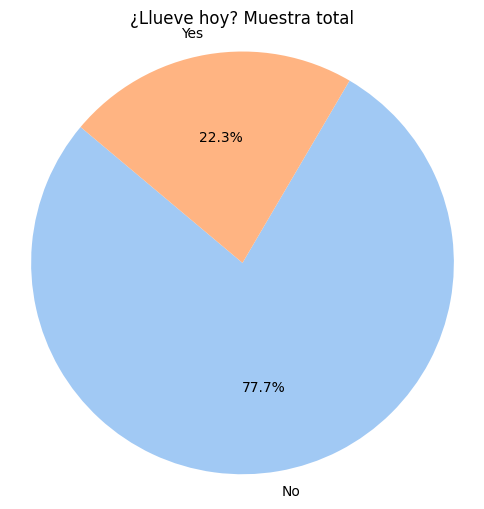

In [169]:
# Distribución de la columna 'RainToday'
class_counts = temperature_df['RainToday'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.axis('equal')  # Hace que el gráfico sea circular
plt.title('¿Llueve hoy? Muestra total')
plt.show()

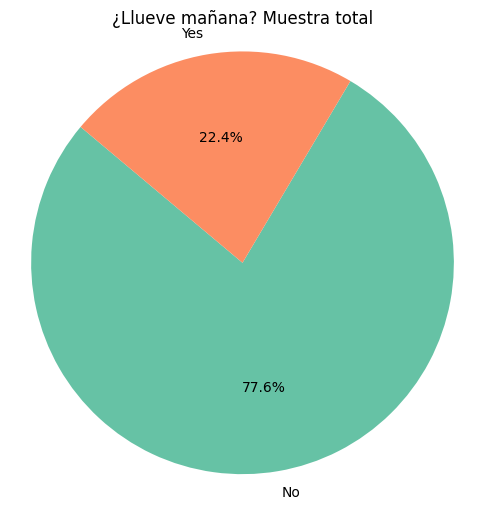

In [170]:
# Distribución de la columna 'RainTomorrow'
class_counts = temperature_df['RainTomorrow'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.axis('equal')  # Hace que el gráfico sea circular
plt.title('¿Llueve mañana? Muestra total')
plt.show()

#### 2.2.2. Análisis de correlacion

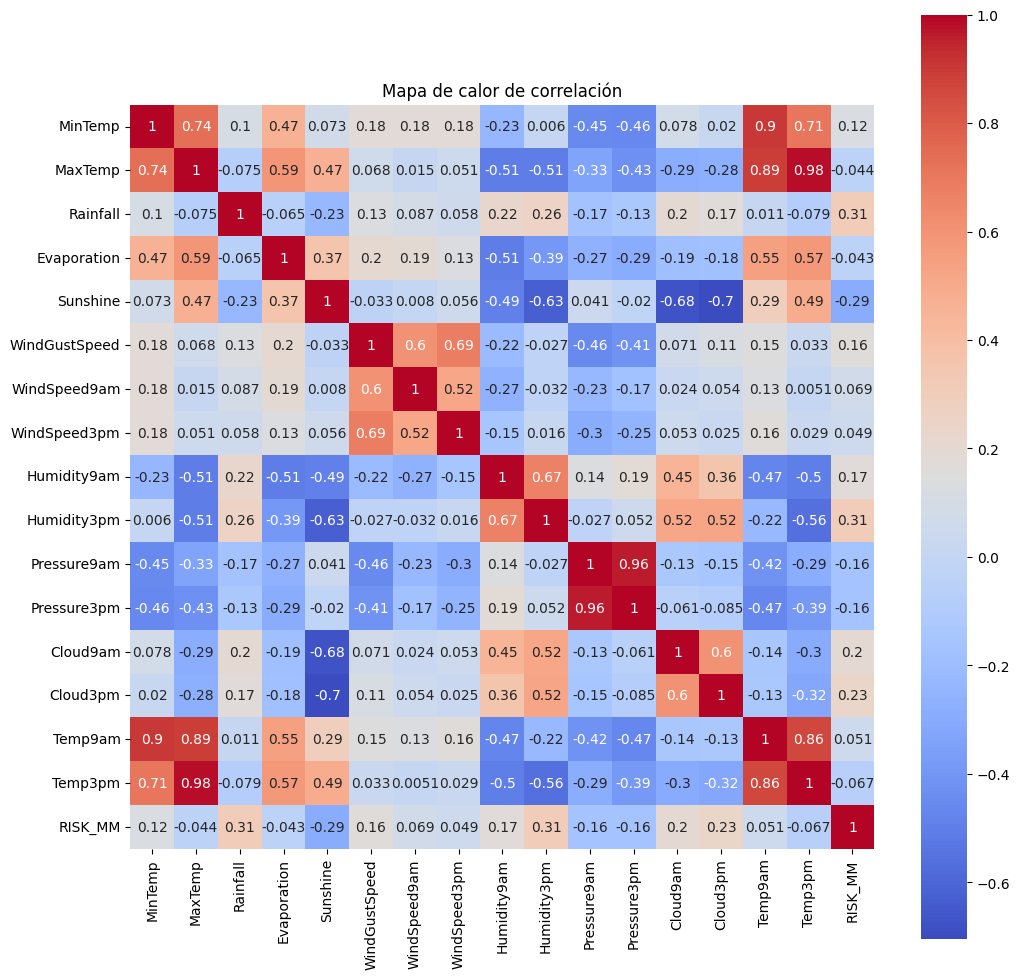

In [171]:
# Vamos ahora a trazar un nuevo mapa de calor con todos los valores imputados
dfco = temperature_df.select_dtypes(include='number')
corr = dfco.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, annot=True, cmap="coolwarm", square=True)
plt.title("Mapa de calor de correlación")
plt.show()

In [172]:
def generate_jointplot(df, x_col, y_col, hue_col, xlim=None, ylim=None):
    grid = sns.jointplot(data=df, x=x_col, y=y_col, hue=hue_col,
                         palette="seismic", s=15, xlim=xlim, ylim=ylim)
    grid.fig.set_figwidth(11)
    grid.fig.set_figheight(4)
    grid.set_axis_labels(x_col, y_col)
    title = f"Relación entre {x_col} y {y_col} por clase '{hue_col}'"
    grid.fig.suptitle(title, y=1.03)
    plt.show()

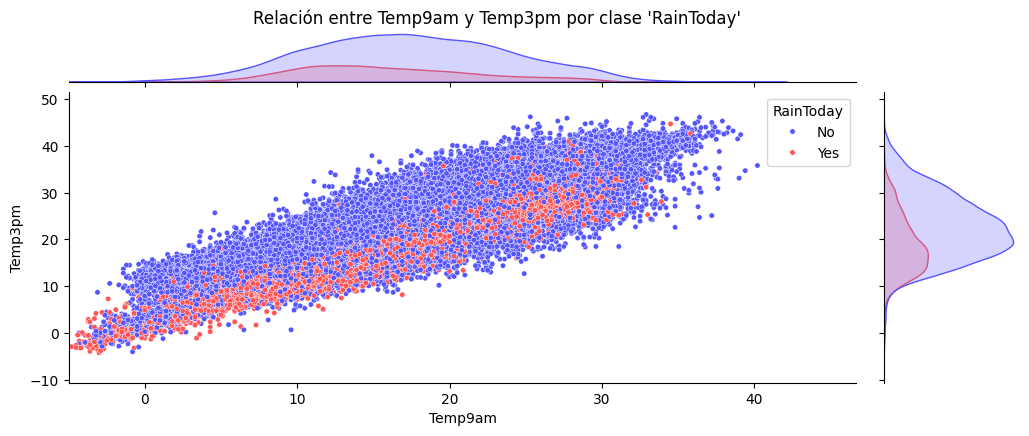

In [173]:
generate_jointplot(temperature_df, "Temp9am", "Temp3pm", "RainToday", xlim=(-5, max(temperature_df["Temp3pm"])))

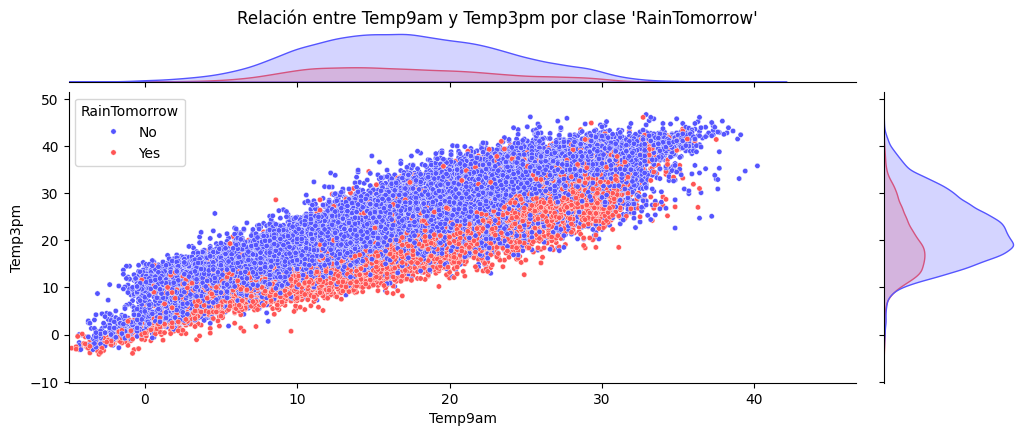

In [174]:
generate_jointplot(temperature_df, "Temp9am", "Temp3pm", "RainTomorrow", xlim=(-5, max(temperature_df["Temp3pm"])))

#### 2.2.3. Análisis de outliers

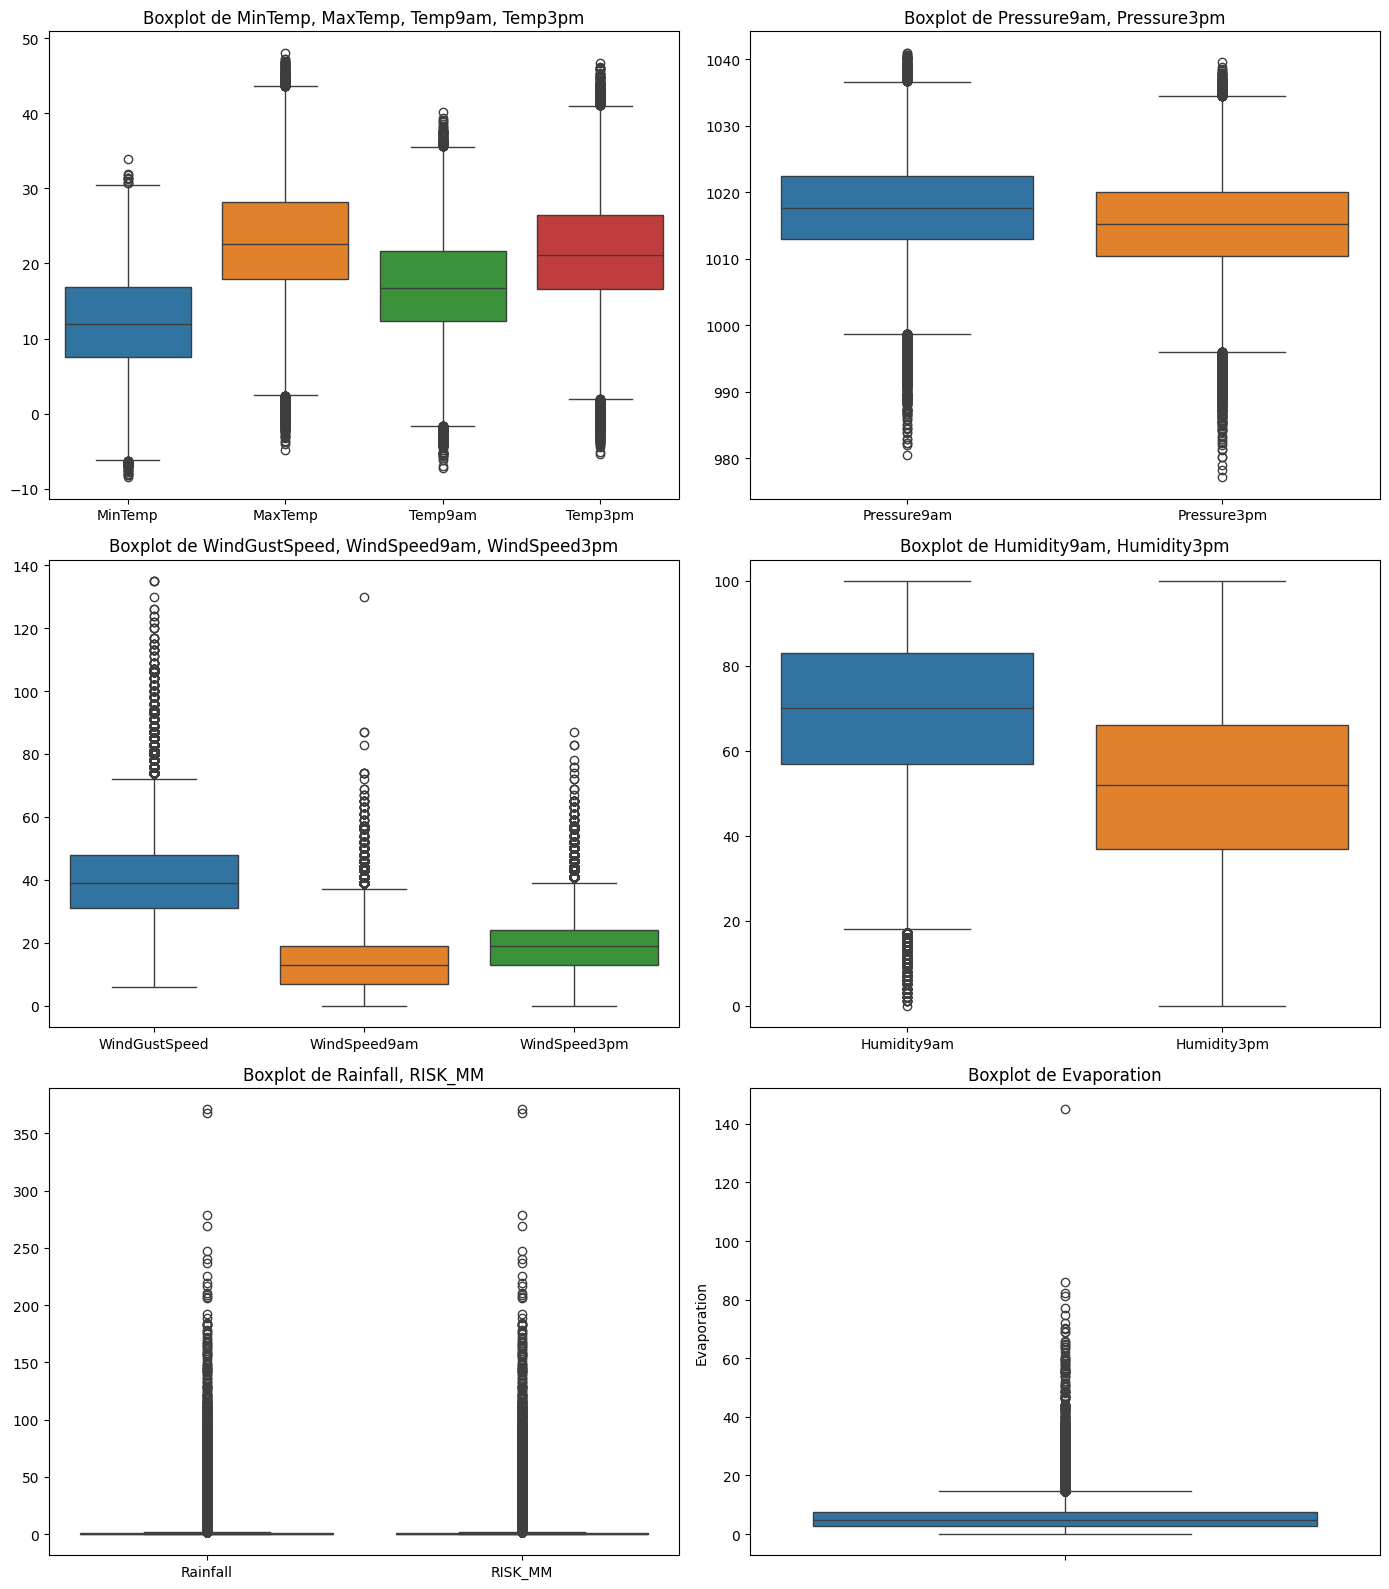

In [175]:
fig, axs = plt.subplots(3, 2, figsize=(14, 16))
sns.boxplot(data=temperature_df[["MinTemp", "MaxTemp", "Temp9am", "Temp3pm"]], ax=axs[0, 0])
axs[0, 0].set_title("Boxplot de MinTemp, MaxTemp, Temp9am, Temp3pm")
sns.boxplot(data=temperature_df[["Pressure9am", "Pressure3pm"]], ax=axs[0, 1])
axs[0, 1].set_title("Boxplot de Pressure9am, Pressure3pm")
sns.boxplot(data=temperature_df[["WindGustSpeed", "WindSpeed9am", "WindSpeed3pm"]], ax=axs[1, 0])
axs[1, 0].set_title("Boxplot de WindGustSpeed, WindSpeed9am, WindSpeed3pm")
sns.boxplot(data=temperature_df[["Humidity9am", "Humidity3pm"]], ax=axs[1, 1])
axs[1, 1].set_title("Boxplot de Humidity9am, Humidity3pm")
sns.boxplot(data=temperature_df[["Rainfall", "RISK_MM"]], ax=axs[2, 0])
axs[2, 0].set_title("Boxplot de Rainfall, RISK_MM")
sns.boxplot(data=temperature_df["Evaporation"], ax=axs[2, 1])
axs[2, 1].set_title("Boxplot de Evaporation")
plt.tight_layout()
plt.show()

In [176]:
columns = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'Pressure9am', 'Pressure3pm', 'WindGustSpeed', 'WindSpeed9am',
        'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Rainfall', 'RISK_MM', 'Evaporation']
for column in columns:
    media = temperature_df[column].mean()
    desviacion_estandar = temperature_df[column].std()
    temperature_df['Z_Score'] = (temperature_df[column] - media) / desviacion_estandar
    limite_inferior = round(media - 3 * desviacion_estandar, 1)
    limite_superior = round(media + 3 * desviacion_estandar, 1)
    outliers = temperature_df[(temperature_df['Z_Score'] > 3) | (temperature_df['Z_Score'] < -3)]
    num_outliers = outliers.shape[0]
    print("=========================================")
    print("Outliers Humidity9am:", num_outliers)
    print("Límite inferior:", limite_inferior)
    print("Límite superior:", limite_superior)

Outliers Humidity9am: 19
Límite inferior: -7.0
Límite superior: 31.4
Outliers Humidity9am: 309
Límite inferior: 1.9
Límite superior: 44.6
Outliers Humidity9am: 138
Límite inferior: -2.5
Límite superior: 36.5
Outliers Humidity9am: 370
Límite inferior: 0.9
Límite superior: 42.5
Outliers Humidity9am: 499
Límite inferior: 996.3
Límite superior: 1039.0
Outliers Humidity9am: 421
Límite inferior: 994.1
Límite superior: 1036.4
Outliers Humidity9am: 1331
Límite inferior: -0.8
Límite superior: 80.8
Outliers Humidity9am: 1309
Límite inferior: -12.7
Límite superior: 40.7
Outliers Humidity9am: 934
Límite inferior: -7.8
Límite superior: 45.0
Outliers Humidity9am: 471
Límite inferior: 11.7
Límite superior: 126.0
Outliers Humidity9am: 0
Límite inferior: -10.9
Límite superior: 113.9
Outliers Humidity9am: 2409
Límite inferior: -23.0
Límite superior: 27.7
Outliers Humidity9am: 2456
Límite inferior: -23.1
Límite superior: 27.8
Outliers Humidity9am: 856
Límite inferior: -7.1
Límite superior: 18.0


## 3. **DATA PREPARATION**

### 3.1. **Eliminar columnas**

In [225]:
temp_df_transformed = temperature_df.copy()

In [226]:
# Vamos a convertir la fecha a formato Date para luego extraer el año y el mes
temp_df_transformed['Date'] = pd.to_datetime(temp_df_transformed['Date'])
temp_df_transformed['DateYear'] = temp_df_transformed['Date'].dt.year
temp_df_transformed['DateMonth'] = temp_df_transformed['Date'].dt.month

In [227]:
columns_to_remove = ['Date','Evaporation','Sunshine','WindGustDir', 'WindDir9am', 'WindDir3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm', 'RainToday', 'Z_Score']
temp_df_transformed.drop(columns=columns_to_remove, inplace=True)

In [228]:
temp_df_transformed.isna().sum()

Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
RISK_MM              0
RainTomorrow         0
DateYear             0
DateMonth            0
dtype: int64

### 3.2. **Encoding**

In [229]:
# Aplicar One-Hot Encoding a la columna 'Location' con nombres de columnas personalizados
location_encoded = pd.get_dummies(temp_df_transformed['Location'], prefix='')
# Concatenar las nuevas columnas al DataFrame original
temp_df_transformed = pd.concat([temp_df_transformed, location_encoded], axis=1)

In [230]:
# Crear una instancia del Label Encoder
encoder = LabelEncoder()
# Transformar las columnas categóricas
for column in temp_df_transformed.columns:
    if temp_df_transformed[column].dtype == 'object':
        temp_df_transformed[column] = encoder.fit_transform(temp_df_transformed[column])

In [231]:
temp_df_transformed.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 64 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Location           142193 non-null  int64  
 1   MinTemp            141556 non-null  float64
 2   MaxTemp            141871 non-null  float64
 3   Rainfall           140787 non-null  float64
 4   WindGustSpeed      132923 non-null  float64
 5   WindSpeed9am       140845 non-null  float64
 6   WindSpeed3pm       139563 non-null  float64
 7   Humidity9am        140419 non-null  float64
 8   Humidity3pm        138583 non-null  float64
 9   Pressure9am        128179 non-null  float64
 10  Pressure3pm        128212 non-null  float64
 11  RISK_MM            142193 non-null  float64
 12  RainTomorrow       142193 non-null  int64  
 13  DateYear           142193 non-null  int32  
 14  DateMonth          142193 non-null  int32  
 15  _Adelaide          142193 non-null  bool   
 16  _A

### 3.3. **Tratamiento de valores nulos**

In [232]:
temp_df_transformed.isna().sum()

Location            0
MinTemp           637
MaxTemp           322
Rainfall         1406
WindGustSpeed    9270
                 ... 
_Watsonia           0
_Williamtown        0
_Witchcliffe        0
_Wollongong         0
_Woomera            0
Length: 64, dtype: int64

In [233]:
temp_df_imputed = temp_df_transformed.copy()

In [234]:
mean_columns = ['MinTemp', 'MaxTemp']

for column in temp_df_imputed:
    if column in mean_columns:
        mean = temp_df_imputed[column].mean()
        temp_df_imputed[column] = temp_df_imputed[column].fillna(mean)

In [235]:
median_columns = ['Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm']

for column in temp_df_imputed:
    if column in median_columns:
        median = temp_df_imputed[column].median()
        temp_df_imputed[column] = temp_df_imputed[column].fillna(median)

In [236]:
knn_columns = ['Pressure9am', 'Pressure3pm']

scaler = StandardScaler()
temp_df_imputed[knn_columns] = scaler.fit_transform(temp_df_imputed[knn_columns])
imputer = KNNImputer(n_neighbors=5)
temp_df_imputed[knn_columns] = imputer.fit_transform(temp_df_imputed[knn_columns])
temp_df_imputed[knn_columns] = scaler.inverse_transform(temp_df_imputed[knn_columns])

In [237]:
temp_df_imputed.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
                ..
_Watsonia        0
_Williamtown     0
_Witchcliffe     0
_Wollongong      0
_Woomera         0
Length: 64, dtype: int64

### 3.4. **Escalamiento**

In [238]:
temp_df_scaled = temp_df_imputed.copy()

In [239]:
scaled_columns = temp_df_scaled.columns[temp_df_scaled.columns != 'RainTomorrow']
scaler = StandardScaler()
temp_df_scaled[scaled_columns] = scaler.fit_transform(temp_df_scaled[scaled_columns])

#### 3.2.2 **Tratamiento de outliers**

No se tratan

## 4. **MODELING**

### 4.1. **Análisis Supervisado**

#### 4.1.1. **Regresión**

In [253]:
columns_regression = ['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'RISK_MM', 'RainTomorrow', 'DateYear', 'DateMonth']

temp_df_regression = temp_df_scaled[columns_regression]

X = temp_df_regression
y = temp_df_imputed['MaxTemp']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29, shuffle=True)

In [254]:
temp_df_regression.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,RISK_MM,RainTomorrow,DateYear,DateMonth
0,-1.527004,0.189954,-0.045964,-0.204920,0.310479,0.678693,0.614071,0.113127,-1.436563,-1.474450,-1.219887,-0.278450,0,-1.872674,1.633581
1,-1.527004,-0.749174,0.263480,-0.276125,0.310479,-1.128893,0.384757,-1.312997,-1.290451,-1.044904,-1.115204,-0.278450,0,-1.872674,1.633581
2,-1.527004,0.111694,0.347873,-0.276125,0.462679,0.565719,0.843386,-1.629913,-1.046931,-1.489262,-0.980612,-0.278450,0,-1.872674,1.633581
3,-1.527004,-0.467436,0.671383,-0.276125,-1.211523,-0.338074,-1.105785,-1.260177,-1.728788,-0.008068,-0.367468,-0.160497,0,-1.872674,1.633581
4,-1.527004,0.831692,1.276205,-0.157450,0.082179,-0.789970,0.155443,0.694140,-0.900818,-1.015280,-1.384389,-0.254859,0,-1.872674,1.633581


##### 4.1.1.1. **Regresión Múltiple**

In [255]:
# Creando y entrenando el modelo de regresión lineal múltiple
linear_reg_mult = LinearRegression()
linear_reg_mult.fit(X_train, y_train)

# Realizando predicciones en el conjunto de prueba
y_pred_mult = linear_reg_mult.predict(X_test)

# Calculando métricas de rendimiento
mse_mult = mean_squared_error(y_test, y_pred_mult)
r2_mult = r2_score(y_test, y_pred_mult)

print(f"MSE (Regresión Múltiple): {mse_mult}")
print(f"R² (Regresión Múltiple): {r2_mult}")

MSE (Regresión Múltiple): 1.3143329964847048e-27
R² (Regresión Múltiple): 1.0


##### 4.1.1.2. **Lasso**

In [256]:
# Creando y entrenando el modelo LASSO
lasso_reg = Lasso(alpha=0.1)  # El valor de alpha puede ajustarse según sea necesario
lasso_reg.fit(X_train, y_train)

# Realizando predicciones en el conjunto de prueba
y_pred_lasso = lasso_reg.predict(X_test)

# Calculando métricas de rendimiento
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"MSE (LASSO): {mse_lasso}")
print(f"R² (LASSO): {r2_lasso}")

MSE (LASSO): 0.00987499282003439
R² (LASSO): 0.9998029826280691


##### 4.1.1.3. **Árbol de Regresión**

In [257]:
# Crear y entrenar el modelo
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Predecir y evaluar
y_pred = regressor.predict(X_test)
mse_tree_reg = mean_squared_error(y_test, y_pred)
r2_tree_reg = r2_score(y_test, y_pred)

print(f"MSE (ARBOL DE REGRESIÓN): {mse_tree_reg}")
print(f"R² (ARBOL DE REGRESIÓN): {r2_tree_reg}")

MSE (ARBOL DE REGRESIÓN): 0.00015682689264742057
R² (ARBOL DE REGRESIÓN): 0.999996871124587


#### 4.1.2. **Clasificación**

In [258]:
columns_classification = ['DateYear', 'DateMonth', '_Adelaide', '_Albany', '_Albury',
 '_AliceSprings', '_BadgerysCreek', '_Ballarat', '_Bendigo', '_Brisbane',
 '_Cairns', '_Canberra', '_Cobar', '_CoffsHarbour', '_Dartmoor', '_Darwin',
 '_GoldCoast', '_Hobart', '_Katherine', '_Launceston', '_Melbourne',
 '_MelbourneAirport', '_Mildura', '_Moree', '_MountGambier', '_MountGinini',
 '_Newcastle', '_Nhil', '_NorahHead', '_NorfolkIsland', '_Nuriootpa',
 '_PearceRAAF', '_Penrith', '_Perth', '_PerthAirport', '_Portland', '_Richmond',
 '_Sale', '_SalmonGums', '_Sydney', '_SydneyAirport', '_Townsville',
 '_Tuggeranong', '_Uluru', '_WaggaWagga', '_Walpole', '_Watsonia',
 '_Williamtown', '_Witchcliffe', '_Wollongong', '_Woomera','MinTemp', 'MaxTemp', 'Rainfall',
 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
 'Pressure9am', 'Pressure3pm', 'RISK_MM','RainTomorrow']

temp_df_classification = temp_df_scaled[columns_classification]

# Separar las características (W) y nuestro target (z)
W = temp_df_regression
z = temp_df_imputed['RainTomorrow']

# Dividir el conjunto de datos en entrenamiento y prueba
W_train, W_test, z_train, z_test = train_test_split(W, z, test_size=0.2, random_state=29)

##### 4.1.2.1. **Regresión Logística**

In [262]:
model_lr = LogisticRegression(random_state=29)
model_lr.fit(W_train, z_train)

# Realizar predicciones en el conjunto de prueba
lr_z_pred = model_lr.predict(W_test)

# Evaluar el rendimiento del modelo
accuracy_rl = accuracy_score(z_test, lr_z_pred)
confusion_rl = confusion_matrix(z_test, lr_z_pred)
report_rl = classification_report(z_test, lr_z_pred)
report_rl_dict = classification_report(z_test, lr_z_pred, output_dict=True)

# Extraer precisión, recall y puntaje F1 promedio
precision_rl = report_rl_dict['weighted avg']['precision']
recall_rl = report_rl_dict['weighted avg']['recall']
f1score_rl = report_rl_dict['weighted avg']['f1-score']

# Imprimir resultados
print("Precisión:", accuracy_rl)
print("\nMatriz de confusión:")
print(confusion_rl)
print("\nInforme de clasificación:")
print(report_rl)

Precisión: 1.0

Matriz de confusión:
[[22076     0]
 [    0  6363]]

Informe de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22076
           1       1.00      1.00      1.00      6363

    accuracy                           1.00     28439
   macro avg       1.00      1.00      1.00     28439
weighted avg       1.00      1.00      1.00     28439



##### 4.1.2.2. **Árbol de clasificación**

In [264]:
model_classifier = DecisionTreeClassifier(max_features=5,random_state=29)
model_classifier.fit(W_train, z_train)

cl_y_pred = model_classifier.predict(W_test)

# Evaluar el rendimiento del modelo
accuracy_tr = accuracy_score(z_test, cl_y_pred)
confusion_tr = confusion_matrix(z_test, cl_y_pred)
report_tr = classification_report(z_test, cl_y_pred)
report_tr_dict = classification_report(z_test, cl_y_pred, output_dict=True)

# Extraer precisión, recall y puntaje F1 promedio
precision_tr = report_tr_dict['weighted avg']['precision']
recall_tr = report_tr_dict['weighted avg']['recall']
f1score_tr = report_tr_dict['weighted avg']['f1-score']

# Imprimir resultados
print("Precisión:", accuracy_tr)
print("\nMatriz de confusión:")
print(confusion_tr)
print("\nInforme de clasificación:")
print(report_tr)

Precisión: 1.0

Matriz de confusión:
[[22076     0]
 [    0  6363]]

Informe de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22076
           1       1.00      1.00      1.00      6363

    accuracy                           1.00     28439
   macro avg       1.00      1.00      1.00     28439
weighted avg       1.00      1.00      1.00     28439



##### 4.1.2.3. **Naive Bayes**

In [265]:
model_bayes = GaussianNB()
model_bayes.fit(W_train, z_train)

# Realizar predicciones en el conjunto de prueba
gb_y_pred = model_bayes.predict(W_test)

# Evaluar el rendimiento del modelo
accuracy_nb = accuracy_score(z_test, gb_y_pred)
confusion_nb = confusion_matrix(z_test, gb_y_pred)
report_nb = classification_report(z_test, gb_y_pred)
report_nb_dict = classification_report(z_test, gb_y_pred, output_dict=True)

# Extraer precisión, recall y puntaje F1 promedio
precision_nb = report_nb_dict['weighted avg']['precision']
recall_nb = report_nb_dict['weighted avg']['recall']
f1score_nb = report_nb_dict['weighted avg']['f1-score']


# Imprimir resultados
print("Precisión:", accuracy_nb)
print("\nMatriz de confusión:")
print(confusion_nb)
print("\nInforme de clasificación:")
print(report_nb)

Precisión: 1.0

Matriz de confusión:
[[22076     0]
 [    0  6363]]

Informe de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22076
           1       1.00      1.00      1.00      6363

    accuracy                           1.00     28439
   macro avg       1.00      1.00      1.00     28439
weighted avg       1.00      1.00      1.00     28439

